<a href="https://colab.research.google.com/github/RITIK-12/safe-to-fly/blob/main/Notebooks/AI_in_FD_Autokeras_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install autokeras

     |████████████████████████████████| 166 kB 11.0 MB/s 
     |████████████████████████████████| 454.4 MB 23 kB/s 
     |████████████████████████████████| 97 kB 6.8 MB/s 
     |████████████████████████████████| 462 kB 56.3 MB/s 
     |████████████████████████████████| 1.2 MB 35.3 MB/s 
     |████████████████████████████████| 4.0 MB 40.6 MB/s 
  Created wheel for wrapt: filename=wrapt-1.12.1-cp37-cp37m-linux_x86_64.whl size=68727 sha256=340d0b91827dc6e3df78e2c557b59b26012982625c2aae7417ba45845a0e412d
  Stored in directory: /root/.cache/pip/wheels/62/76/4c/aa25851149f3f6d9785f6c869387ad82b3fd37582fa8147ac6
Successfully built wrapt
  Attempting uninstall: typing-extensions
    Found existing installation: typing-extensions 3.10.0.2
    Uninstalling typing-extensions-3.10.0.2:
      Successfully uninstalled typing-extensions-3.10.0.2
  Attempting uninstall: grpcio
    Found existing installation: grpcio 1.42.0
    Uninstalling grpcio-1.42.0:
      Successfully uninstalled grpcio-1.42.0
  

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import tensorflow as tf
import autokeras as ak

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/AIFD_project/Work_2/notebooks/df_combined_multiclass.csv')
df

,time,phi,psi,theta,mode,Ax,Ay,Az,east,north,course,alt,vel,climb,vel_3d,Gx,Gy,Gz,S0,S1,S2,C0,C1,C2,Throttle,Volt,Amp,Watt,mAh,Wh,Ps,Pdyn_AD,temp,qnh,amsl_baro,airspeed,TAS,D_roll,D_pitch,D_course,D_x,D_y,D_altitude,D_climb,D_airspeed,m1,m2,add1,add2,fault
0,44.0,-0.012684,3.128628,-0.075276,0.0,0.385938,0.111523,-9.750977,36028090.44,4.813616e+08,3328.00,189.07188,0.0968,-0.1000,0.139597,-0.004541,-0.002881,-0.004639,1042.0,1410.0,1410.0,21.0,0.0,-29.0,0.0,12.390279,0.025436,0.315154,0.000471,0.005825,-1.0,1.921144,18.700001,-1.0,0.0,1.770933,1.787068,0.0,0.0,0.0,0.0,0.0,235.0,0.0,12.0,1.0,1.0,0.0,0.0,0
1,44.1,-0.012709,3.128594,-0.075270,0.0,0.380859,0.106446,-9.752735,36028090.94,4.813616e+08,3328.00,189.07288,0.0818,-0.1000,0.129298,-0.005127,-0.003174,-0.004834,1042.0,1410.0,1410.0,21.0,0.0,-29.0,0.0,12.386227,0.028483,0.352725,0.000472,0.005841,-1.0,1.865325,18.700001,-1.0,0.0,1.745056,1.760955,0.0,0.0,0.0,0.0,0.0,235.0,0.0,12.0,1.0,1.0,0.0,0.0,0
2,44.2,-0.012701,3.128564,-0.075245,0.0,0.376172,0.102734,-9.745898,36028090.56,4.813616e+08,3328.00,189.07168,0.1064,-0.1088,0.152847,-0.004150,-0.002734,-0.004053,1042.0,1410.0,1410.0,21.0,0.0,-29.0,0.0,12.381286,0.032623,0.403797,0.000473,0.005858,-1.0,1.672796,18.700001,-1.0,0.0,1.652509,1.667564,0.0,0.0,0.0,0.0,0.0,235.0,0.0,12.0,1.0,1.0,0.0,0.0,0
3,44.3,-0.012707,3.128566,-0.075279,0.0,0.363282,0.095703,-9.742188,36028090.06,4.813616e+08,3328.00,189.07018,0.1364,-0.1188,0.181011,-0.004346,-0.003857,-0.005420,1042.0,1410.0,1410.0,21.0,0.0,-29.0,0.0,12.376344,0.036763,0.454869,0.000474,0.005874,-1.0,1.673503,18.700001,-1.0,0.0,1.652944,1.668003,0.0,0.0,0.0,0.0,0.0,235.0,0.0,12.0,1.0,1.0,0.0,0.0,0
4,44.4,-0.012700,3.128508,-0.075287,0.0,0.375000,0.113477,-9.741211,36028090.00,4.813616e+08,3328.00,189.06120,0.1136,-0.0936,0.147259,-0.004346,-0.003760,-0.005127,1042.0,1410.0,1410.0,21.0,0.0,-29.0,0.0,12.371403,0.040903,0.505941,0.000476,0.005891,-1.0,1.911660,18.700001,-1.0,0.0,1.766297,1.782388,0.0,0.0,0.0,0.0,0.0,235.0,0.0,12.0,1.0,1.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62123,3269.5,-0.017212,-3.020877,-0.070188,0.0,0.433594,0.118360,-9.661523,36028053.68,4.813609e+08,76.00,184.99924,0.2824,-0.5476,0.616640,0.008691,0.008398,-0.005029,1043.0,1410.0,1410.0,36.0,0.0,0.0,0.0,10.599711,0.029245,0.309990,1.644927,18.341418,-1.0,0.005620,25.799999,-1.0,0.0,0.099524,0.100412,0.0,0.0,0.5,48.0,102.0,270.0,4.0,12.0,1.0,1.0,0.0,0.0,0
62124,3269.6,-0.015179,-3.021151,-0.069231,0.0,0.454883,0.147265,-9.584179,36028051.62,4.813609e+08,221.18,185.03406,0.3008,-0.4552,0.556362,0.013232,0.003369,-0.001563,1043.0,1410.0,1410.0,36.0,0.0,0.0,0.0,10.600156,0.031232,0.331078,1.644928,18.341427,-1.0,-0.187527,25.799999,-1.0,0.0,0.000000,0.000000,0.0,0.0,0.5,48.0,102.0,270.0,4.0,12.0,1.0,1.0,0.0,0.0,0
62125,3269.7,-0.014398,-3.020987,-0.068787,0.0,0.475977,0.130860,-9.684180,36028048.12,4.813609e+08,434.68,185.08856,0.3608,-0.3452,0.506397,-0.000293,-0.000390,-0.001367,1043.0,1410.0,1410.0,36.0,0.0,0.0,0.0,10.601391,0.034544,0.366239,1.644929,18.341436,-1.0,-0.376094,25.799999,-1.0,0.0,0.000000,0.000000,0.0,0.0,0.5,48.0,102.0,270.0,4.0,12.0,1.0,1.0,0.0,0.0,0
62126,3269.8,-0.013408,-3.020862,-0.068531,0.0,0.499805,0.146680,-9.663867,36028046.66,4.813609e+08,503.00,185.11382,0.2916,-0.3168,0.443057,-0.003369,-0.003564,-0.001855,1043.0,1410.0,1410.0,36.0,0.0,0.0,0.0,10.602627,0.037856,0.401400,1.644930,18.341446,-1.0,-0.653622,25.799999,-1.0,0.0,0.000000,0.000000,0.0,0.0,0.5,49.0,102.0,270.0,4.0,12.0,1.0,1.0,0.0,0.0,0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


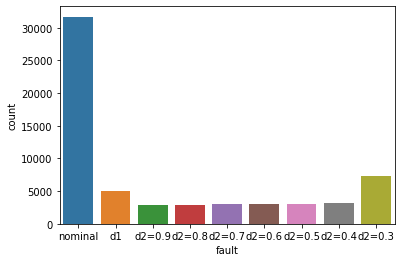

In [ ]:
import seaborn as sns
g = sns.countplot(df['fault'])
g.set_xticklabels(['nominal','d1','d2=0.9','d2=0.8','d2=0.7','d2=0.6','d2=0.5','d2=0.4','d2=0.3'])
plt.show()

In [ ]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.20)

In [ ]:
X_train.shape

(49702, 49)

In [ ]:
X_test.shape

(12426, 49)

In [ ]:
# Initialize the structured data classifier.
clf = ak.StructuredDataClassifier(
    overwrite=True, max_trials=3
)  # It tries 3 different models.
# Feed the structured data classifier with training data.

In [ ]:
clf.fit(
    X_train,
    y_train,
    validation_split=0.2,
    epochs=20,
)

Trial 3 Complete [00h 02m 58s]
val_accuracy: 0.9998989105224609

Best val_accuracy So Far: 0.9998989105224609
Total elapsed time: 00h 07m 23s
INFO:tensorflow:Oracle triggered exit
Epoch 1/20
1554/1554 [==============================] - 7s 4ms/step - loss: 0.3358 - accuracy: 0.8939
Epoch 2/20
1554/1554 [==============================] - 6s 4ms/step - loss: 0.0416 - accuracy: 0.9897
Epoch 3/20
1554/1554 [==============================] - 6s 4ms/step - loss: 0.0182 - accuracy: 0.9963
Epoch 4/20
1554/1554 [==============================] - 6s 4ms/step - loss: 0.0118 - accuracy: 0.9972
Epoch 5/20
1554/1554 [==============================] - 6s 4ms/step - loss: 0.0089 - accuracy: 0.9978
Epoch 6/20
1554/1554 [==============================] - 6s 4ms/step - loss: 0.0067 - accuracy: 0.9982
Epoch 7/20
1554/1554 [==============================] - 6s 4ms/step - loss: 0.0057 - accuracy: 0.9985
Epoch 8/20
1554/1554 [==============================] - 6s 4ms/step - loss: 0.0060 - accuracy: 0.9985
Epoc

In [ ]:
model = clf.export_model()
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 49)]              0         
_________________________________________________________________
multi_category_encoding (Mul (None, 49)                0         
_________________________________________________________________
normalization (Normalization (None, 49)                99        
_________________________________________________________________
dense (Dense)                (None, 32)                1600      
_________________________________________________________________
batch_normalization (BatchNo (None, 32)                128       
_________________________________________________________________
re_lu (ReLU)                 (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                1056  

In [ ]:
loss, acc = clf.evaluate(X_test, y_test, verbose=0)
print('Accuracy:',acc)

Accuracy: 0.9973442554473877


In [ ]:
pred = clf.predict(X_test)

389/389 [==============================] - 1s 3ms/step


In [ ]:
pred2 = []
for x in pred:
  pred2.append([int(x[0])])
pred2

[[0],
 [0],
 [8],
 [6],
 [0],
 [5],
 [6],
 [3],
 [7],
 [6],
 [4],
 [8],
 [3],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [1],
 [0],
 [0],
 [2],
 [6],
 [4],
 [5],
 [0],
 [0],
 [4],
 [3],
 [0],
 [0],
 [0],
 [0],
 [8],
 [1],
 [0],
 [8],
 [2],
 [1],
 [0],
 [4],
 [0],
 [7],
 [8],
 [1],
 [1],
 [0],
 [0],
 [3],
 [4],
 [8],
 [2],
 [0],
 [2],
 [6],
 [0],
 [0],
 [3],
 [0],
 [5],
 [0],
 [0],
 [0],
 [6],
 [1],
 [2],
 [2],
 [0],
 [0],
 [0],
 [3],
 [1],
 [2],
 [5],
 [5],
 [0],
 [8],
 [0],
 [0],
 [2],
 [8],
 [0],
 [0],
 [6],
 [6],
 [0],
 [0],
 [5],
 [5],
 [6],
 [5],
 [1],
 [3],
 [0],
 [8],
 [7],
 [0],
 [2],
 [7],
 [8],
 [4],
 [8],
 [7],
 [0],
 [2],
 [0],
 [3],
 [0],
 [0],
 [0],
 [6],
 [0],
 [0],
 [8],
 [0],
 [0],
 [3],
 [0],
 [8],
 [0],
 [1],
 [6],
 [0],
 [0],
 [0],
 [7],
 [7],
 [0],
 [0],
 [0],
 [8],
 [1],
 [0],
 [1],
 [8],
 [4],
 [1],
 [0],
 [1],
 [0],
 [8],
 [0],
 [3],
 [0],
 [4],
 [7],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [8],
 [0],
 [8],
 [3],
 [4],
 [0],
 [4],
 [0],
 [2],
 [0],
 [1],
 [2]

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test, pred2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6385
           1       1.00      1.00      1.00       998
           2       0.96      0.99      0.98       539
           3       1.00      0.96      0.98       573
           4       0.99      1.00      1.00       621
           5       1.00      1.00      1.00       574
           6       1.00      1.00      1.00       650
           7       1.00      1.00      1.00       620
           8       1.00      1.00      1.00      1466

    accuracy                           1.00     12426
   macro avg       0.99      0.99      0.99     12426
weighted avg       1.00      1.00      1.00     12426



In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

In [ ]:
cm = confusion_matrix(y_test, pred2)
cm

array([[6383,    0,    0,    0,    0,    0,    0,    0,    2],
       [   0,  998,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,  535,    0,    4,    0,    0,    0,    0],
       [   0,    0,   23,  550,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,  621,    0,    0,    0,    0],
       [   1,    0,    0,    0,    0,  572,    1,    0,    0],
       [   0,    2,    0,    0,    0,    0,  648,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,  620,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0, 1466]])

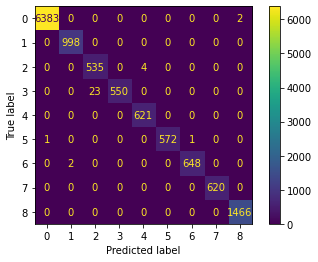

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

plt.show()

In [ ]:
loss, acc = clf.evaluate(X_train, y_train, verbose=0)
print('Accuracy:',acc)

Accuracy: 0.9982495903968811
